## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

In [2]:
# Reading datasets
train_file_path = 'input/train.csv'
test_file_path = 'input/test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

## Exploring data

Text(0.5,1,'Relation between Sex and survival probability')

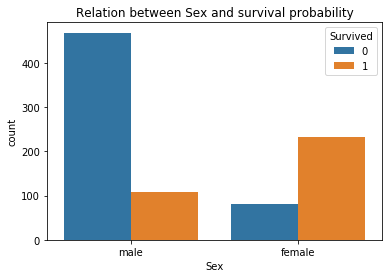

In [3]:
# Sex variable
plot = sns.countplot(x='Sex', hue='Survived', data=train_data)
plot.set_title('Relation between Sex and survival probability')

Text(0.5,1,'Relation between Passenger class and survival probability')

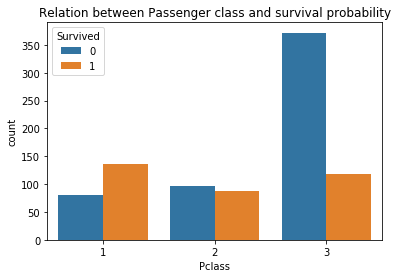

In [4]:
# Pclass variable
plot = sns.countplot(x='Pclass', hue='Survived', data=train_data)
plot.set_title('Relation between Passenger class and survival probability')

Text(0.5,1,'Relation between number of siblins and survival probability')

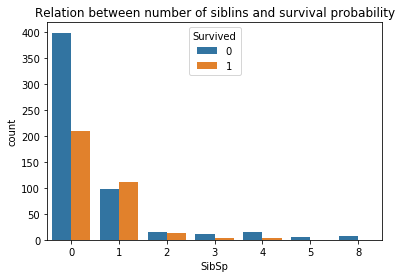

In [5]:
# SibSp variable
plot = sns.countplot(x='SibSp', hue='Survived', data=train_data)
plot.set_title('Relation between number of siblins and survival probability')

Text(0.5,1,'Relation between number of parents and survival probability')

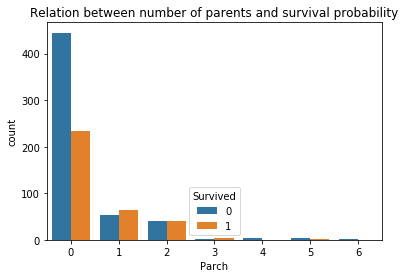

In [6]:
# Parch variable
plot = sns.countplot(x='Parch', hue='Survived', data=train_data)
plot.set_title('Relation between number of parents and survival probability')

Text(0.5,1,'Relation between embarked port and survival probability')

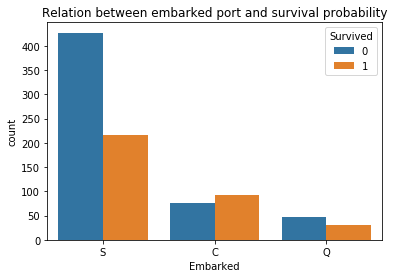

In [7]:
# Embarked variable
plot = sns.countplot(x='Embarked', hue='Survived', data=train_data)
plot.set_title('Relation between embarked port and survival probability')

## Deleting useless columns

Even it exists relation between embarked port and survival probability, it might be mere coincidence. Therefore, in order not to overfit the model to training data, 'Embarked' is removed from features. 

In [8]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

## Checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


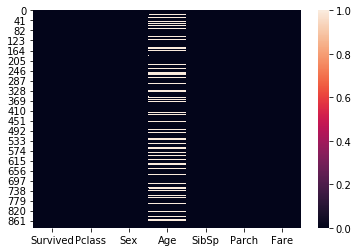

In [9]:
sns.heatmap(train_data.isnull())
train_data.info()

## Imputing null values

In [10]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

## One-hot encoding

In [11]:
categorical_var = ['Sex', 'Pclass']
dummies = pd.get_dummies(train_data[categorical_var])

train_data.drop(train_data[categorical_var], axis=1, inplace=True)
train_data = pd.concat([train_data,dummies], axis=1)

## Splitting data

In [12]:
Y = train_data['Survived']
X = train_data.drop(['Survived'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## Select and train the model

### Option 1: Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.79      0.81       168
          1       0.68      0.76      0.72       100

avg / total       0.78      0.78      0.78       268



### Option 2: Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84       168
          1       0.72      0.76      0.74       100

avg / total       0.80      0.80      0.80       268



### Option 3: XGBClassifier

In [73]:
from xgboost.sklearn import XGBClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84       168
          1       0.72      0.76      0.74       100

avg / total       0.80      0.80      0.80       268



### Option 4 (final): Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88       182
          1       0.74      0.74      0.74        86

avg / total       0.84      0.84      0.84       268



# Generating submission file

## Preprocessing data

In [14]:
test_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True) # Dropping useless columns
test_data['Age'].fillna(test_data['Age'].median(), inplace=True) # Imputting values
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# One-hot encoding
categorical_var = ['Sex', 'Pclass']
dummies = pd.get_dummies(test_data[categorical_var])

test_data.drop(test_data[categorical_var], axis=1, inplace=True)
test_data = pd.concat([test_data,dummies], axis=1)

## Predicting outcomes

In [76]:
# Using Gradient Boosting Classifier estimator
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex_female', 'Sex_male']
X = test_data[features]
predictions = model.predict(X)

predictions_df = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

predictions_df.to_csv('submission.csv', index=False)